In [21]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [22]:
df = yf.download('AAPL', start='2008-01-01', end='2023-07-15')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.914388,1079178800
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.917120,842066400
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.465436,1455832000
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.392282,2072193200
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.198309,1523816000
...,...,...,...,...,...,...
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200


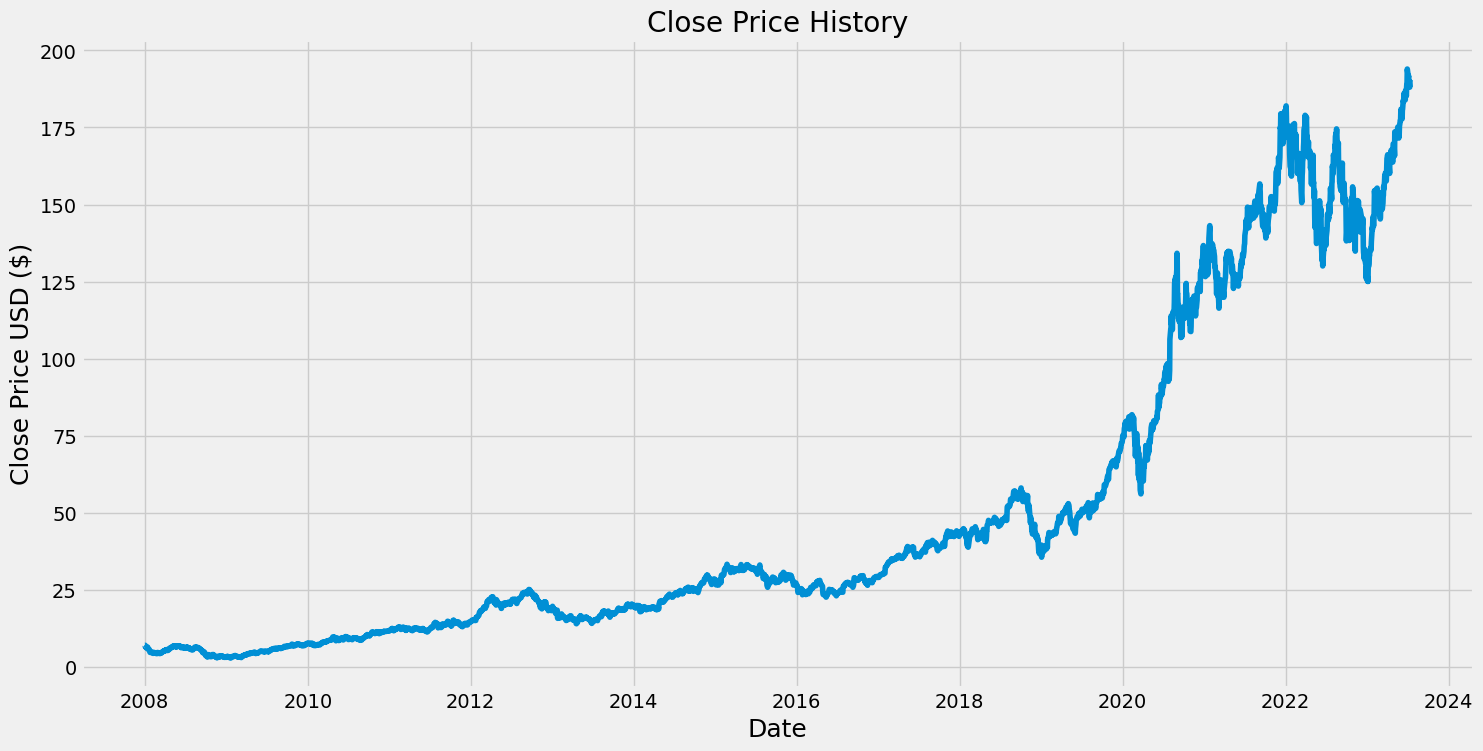

In [23]:
#visualising the price of stock w.r.t to date.
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()



In [24]:
data = df.filter(['Close'])
dataset = data.values #converting to numpy array

training_data_len = math.ceil(len(dataset) * .8)

print(data)

print(dataset)

print(f'The length of training data = {training_data_len}')


                 Close
Date                  
2008-01-02    6.958571
2008-01-03    6.961786
2008-01-04    6.430357
2008-01-07    6.344286
2008-01-08    6.116071
...                ...
2023-07-10  188.610001
2023-07-11  188.080002
2023-07-12  189.770004
2023-07-13  190.539993
2023-07-14  190.690002

[3910 rows x 1 columns]
[[  6.95857096]
 [  6.96178579]
 [  6.43035698]
 ...
 [189.77000427]
 [190.53999329]
 [190.69000244]]
The length of training data = 3128


In [25]:
#preprocessing - MinMax Normalization

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02178981],
       [0.02180663],
       [0.01902686],
       ...,
       [0.97803086],
       [0.98205848],
       [0.98284314]])

In [26]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.02178981, 0.02180663, 0.01902686, 0.01857664, 0.01738291,
       0.01890543, 0.01864763, 0.01765192, 0.01878961, 0.01697005,
       0.01521402, 0.01544753, 0.01553533, 0.01446676, 0.01137128,
       0.01072304, 0.00967876, 0.00967876, 0.00996458, 0.01008414,
       0.01067821, 0.01037744, 0.00998513, 0.00955733, 0.00818239,
       0.00804041, 0.0088325 , 0.00957414, 0.00871668, 0.0095648 ,
       0.00920239, 0.0086737 , 0.00821601, 0.00852239, 0.00809645,
       0.00770789, 0.0077602 , 0.00764997, 0.00836173, 0.00966008,
       0.00874656, 0.00813195, 0.00867184, 0.00864755, 0.0079825 ,
       0.00822909, 0.00775085, 0.00918184, 0.00893524, 0.00929206,
       0.0090436 , 0.00906601, 0.0102037 , 0.00961524, 0.01028777,
       0.01145721, 0.01172809, 0.01249029, 0.01159172, 0.01210732])]
[0.01219885921503213]



In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(3068, 60, 1)

In [28]:
#creating architecture of the model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))




In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
3068/3068 [==============================] - 71s 22ms/step - loss: 1.9884e-04
Epoch 2/10
3068/3068 [==============================] - 68s 22ms/step - loss: 9.1530e-05
Epoch 3/10
3068/3068 [==============================] - 65s 21ms/step - loss: 5.6864e-05
Epoch 4/10
3068/3068 [==============================] - 68s 22ms/step - loss: 5.2579e-05
Epoch 5/10
3068/3068 [==============================] - 67s 22ms/step - loss: 5.1524e-05
Epoch 6/10
3068/3068 [==============================] - 72s 23ms/step - loss: 4.1001e-05
Epoch 7/10
3068/3068 [==============================] - 69s 22ms/step - loss: 3.5746e-05
Epoch 8/10
3068/3068 [==============================] - 71s 23ms/step - loss: 3.5836e-05
Epoch 9/10
3068/3068 [==============================] - 72s 23ms/step - loss: 3.4605e-05
Epoch 10/10
3068/3068 [==============================] - 71s 23ms/step - loss: 3.5705e-05


In [31]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [32]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

25/25 [==============================] - 1s 14ms/step


In [34]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

5.3451805992809405

C:\Users\sharm\AppData\Local\Temp\ipykernel_6380\557013566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


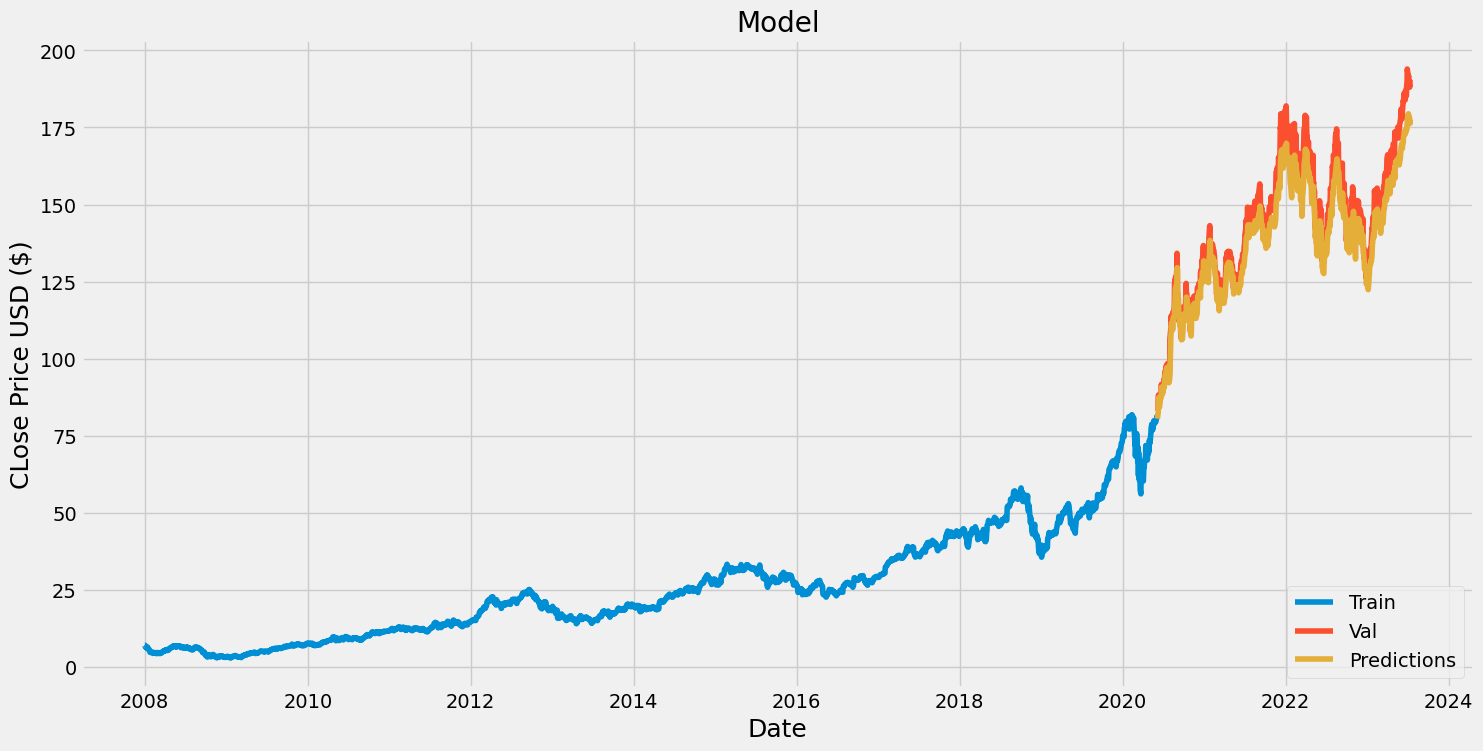

In [35]:
#plotting actual values and the prediction ones.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
valid

,Close,Predictions
Date,,
2020-06-05,82.875000,80.500809
2020-06-08,83.364998,82.105621
2020-06-09,85.997498,82.971794
2020-06-10,88.209999,85.087654
2020-06-11,83.974998,87.322983
...,...,...
2023-07-10,188.610001,178.297714
2023-07-11,188.080002,177.061279
2023-07-12,189.770004,176.269440


In [37]:
apple_quote = yf.download('AAPL', start='2012-01-01', end='2023-07-15')

new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 16ms/step
[[177.82083]]


In [38]:
X_test

array([[[0.86222204],
        [0.85709585],
        [0.84856978],
        [0.8501913 ],
        [0.84203134],
        [0.84197898],
        [0.86630202],
        [0.87294502],
        [0.87247427],
        [0.86698197],
        [0.86128047],
        [0.8525974 ],
        [0.89329272],
        [0.89292652],
        [0.88387735],
        [0.89324036],
        [0.89423421],
        [0.88806196],
        [0.88544659],
        [0.88544659],
        [0.88868963],
        [0.9010342 ],
        [0.90160959],
        [0.89658803],
        [0.88277886],
        [0.88424346],
        [0.89025887],
        [0.90302184],
        [0.91280339],
        [0.91254184],
        [0.92739715],
        [0.9318956 ],
        [0.9247295 ],
        [0.92279415],
        [0.91552341],
        [0.92990797],
        [0.93194796],
        [0.94675092],
        [0.94424018],
        [0.94758785],
        [0.95836319],
        [0.95266169],
        [0.95313244],
        [0.94764021],
        [0.96354166],
        [0

In [39]:
apple_quote = yf.download('AAPL', start='2023-07-17', end='2023-07-18')

apple_quote

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-17,191.899994,194.320007,191.809998,193.990005,193.990005,50520200


In [40]:
# model.save("trained_lstm_model.h5")